In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("amazon/train.csv")

data.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [3]:
def plot_histo(column):
    text_len=data[column].str.len()
    plt.hist(text_len, bins = text_len.max())
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.title("Token lenght for {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column, text_len.min(), text_len.max(), text_len.mean()))

def plot_histo_targets(column):
    plt.hist(data[column].str.replace(' ', '\n '), bins = len(pd.Categorical(data[column]).categories)*2, align="left");    
    plt.xlabel("Label")
    plt.ylabel("Amount of appearances")
    name, count = np.unique(data[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    plt.title("Amount of appearances for {}: \n Minimal: {} appears {} times \n Maximal: {} appears {} times".format(column, name[count.argmin()], count.min(), name[count.argmax()], count.max()))
def get_info(column):
    name, count = np.unique(data[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    print("Amount of appearances for {}: \n * unique values {}  \n * Minimal: {} appears {} times  \n * Maximal: {} appears {} times  \n * in average {:.2f} times.  \n ".format(column, len(count) , name[count.argmin()], count.min(), name[count.argmax()], count.max(), count.mean()))
    

In [4]:
get_info("Cat1")

get_info("Cat2")

get_info("Cat3")

Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: grocery gourmet food appears 3617 times  
 * Maximal: toys games appears 10266 times  
 * in average 6666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: small animals appears 29 times  
 * Maximal: personal care appears 2852 times  
 * in average 625.00 times.  
 
Amount of appearances for Cat3: 
 * unique values 464  
 * Minimal: aprons smocks appears 1 times  
 * Maximal: unknown appears 2262 times  
 * in average 86.21 times.  
 


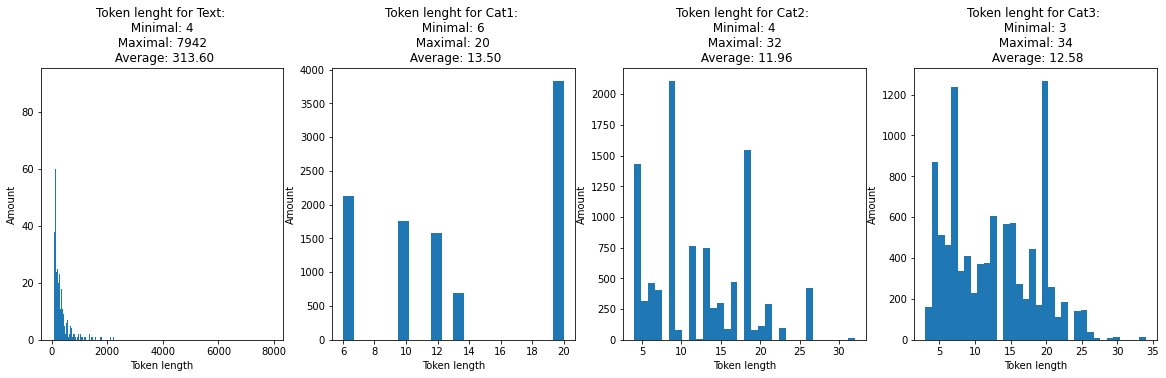

In [19]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_histo("Text")
plt.subplot(1, 4, 2)
plot_histo("Cat1")
plt.subplot(1, 4, 3)
plot_histo("Cat2")
plt.subplot(1, 4, 4)
plot_histo("Cat3")

plt.savefig("./visualizations/Data_analysis.svg", dpi=200, format="svg")
plt.show()


In [6]:
test = pd.read_csv("amazon/test.csv")

In [7]:
def plot_histo(column):
    text_len=test[column].str.len()
    plt.hist(text_len, bins = text_len.max())
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.title("Token lenght for {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column, text_len.min(), text_len.max(), text_len.mean()))

def plot_histo_targets(column):
    plt.hist(test[column].str.replace(' ', '\n '), bins = len(pd.Categorical(test[column]).categories)*2, align="left");    
    plt.xlabel("Label")
    plt.ylabel("Amount of appearances")
    name, count = np.unique(test[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    plt.title("Amount of appearances for {}: \n Minimal: {} appears {} times \n Maximal: {} appears {} times".format(column, name[count.argmin()], count.min(), name[count.argmax()], count.max()))
def get_info(column):
    name, count = np.unique(test[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    print("Amount of appearances for {}: \n * unique values {}  \n * Minimal: {} appears {} times  \n * Maximal: {} appears {} times  \n * in average {:.2f} times.  \n ".format(column, len(count) , name[count.argmin()], count.min(), name[count.argmax()], count.max(), count.mean()))
    

In [8]:
get_info("Cat1")

get_info("Cat2")

get_info("Cat3")

Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: baby products appears 698 times  
 * Maximal: health personal care appears 2992 times  
 * in average 1666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: baby food appears 2 times  
 * Maximal: nutrition wellness appears 904 times  
 * in average 156.25 times.  
 
Amount of appearances for Cat3: 
 * unique values 377  
 * Minimal: aquarium hoods appears 1 times  
 * Maximal: vitamins supplements appears 665 times  
 * in average 26.53 times.  
 


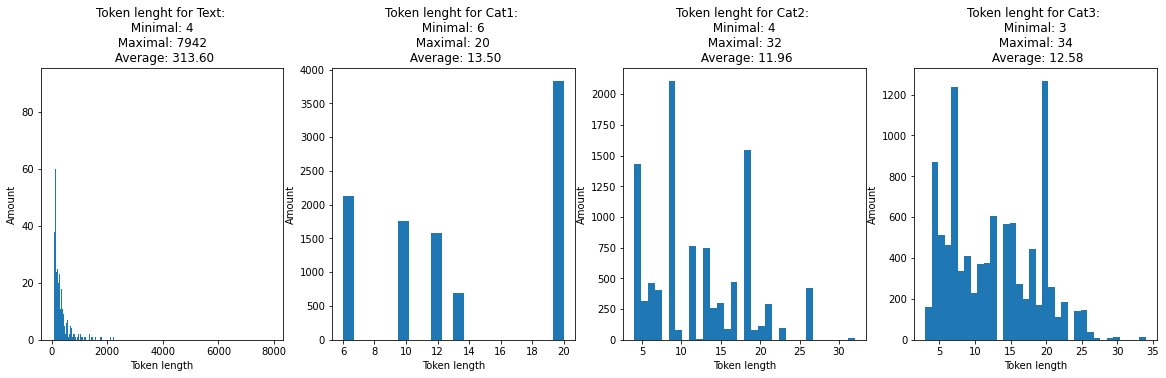

In [18]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_histo("Text")
plt.subplot(1, 4, 2)
plot_histo("Cat1")
plt.subplot(1, 4, 3)
plot_histo("Cat2")
plt.subplot(1, 4, 4)
plot_histo("Cat3")

plt.savefig("./visualizations/Data_analysis_test.svg", dpi=200, format="svg")
plt.show()